<h1>Comparing Fitbit measures and Suicide deaths in the U.S between 2015 and 2016</h1>
<h3>Autor: Franchi Uzcategui</h3>

In [1]:
import pandas as pd
import time

import numpy as np
import scipy.sparse as sp
from sklearn.preprocessing import MaxAbsScaler, scale, StandardScaler, MinMaxScaler

## plotting
import folium
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
# Any results you write to the current directory are saved as output.

## Table of Contents

<li><a href="#wrangling">I.Introduction
<li><a href="#wrangling">II.Data   
<li><a href="#wrangling">1. Data Collection: 1.1 and 1.2</a></li>
<li><a href="#cleaning">2. Data Cleaning: 2.1 and 2.2</a></li>
<li><a href="#methodology">III.Methodology
<li><a href="#eda">3. Exploratory Data Analysis: 3.1 and 3.2</a></li>
<li><a href="#results">III.Results    
<li><a href="#eda">4. Examine Fitbit measures and Suicide deaths: 4.1 and 4.2</a></li>
<li><a href="#eda"> IV. Discussion</a></li>
<li><a href="#eda"> V. Conclusion</a></li>
<li><a href="#eda"> VI. Limitations</a></li>

## Introduction
<p> <p/>

<p>Wearable technology has been used to track daily activities, sports practices, and health conditions. Fitbit is one of the leading companies in wearable technologies. The data produced by these electronic dispositive is exceptionally sensible and personal, and it is rarely delivered to public access; thus, it is restricted. Although, Fitbit posted on its web page interactive graphs with anonymous data collected. We focused on a post from 2017, that presented Fitbit measures tracked between 2015 and 2016 in the U.S. Fitbit measures included the number of steps, active minutes, sleep hours, body mass index, and resting heart rate.<p/>
    
<p>Suicide is a preventable death. This premise has full acceptance, and we think that wearable technologies can help to improve the prevention of suicide. Physical and habits data help to trace patterns of mood behavior that eventually can evolve to suicide. Early symptoms can be associated with not getting enough physical activity and sleep or eating disorders: too little or too much. These symptoms can be tracked with wearable technologies, such as the number of steps, active minutes, sleep hours, body mass index, and resting heart rate. Despite the raw data access is limited, we collected data from the Fitbit post, above mentioned.<p/>
    
<p>In this essay, we compared the Fitbit measures with the official Suicide records at the same time. We reviewed the possible relationship between mood disorders’ warning symptoms (Fitbit measures) with mood disorders records (Suicide and Depression.)<p/>

<h2> Data <h2/>

<p>The two data sets to use were already cleaned. 
<p>The first data set was extracted from interactive graphs on the Fitbit web page - Source: https://www.fitbit.com/us/activity-index <p/>
<p>The second data - Suicide deaths was downloaded from the official web page CDC - Source: https://www.cdc.gov/nchs/pressroom/sosmap/suicide-mortality/suicide.htm <p/>

<h3>1.1 Data collection: Fitbit<h3/>

In [2]:
df_fitbit= pd.read_csv("C:/Users/Franchi/Documents/DataWearabletechnologies/Fitbit Health & Activity Index™.csv")
df_fitbit.head()

,State,Average_Steps,Average_Active_Minutess,Sleep (h),Sleep (min),Sleep,BMI,Average_Resting_Heart_Rate_(bpm)
0,NATIONAL,8170,27,7,16,7.266667,28.1,68.0
1,Alabama,7740,25,7,19,7.316667,27.9,68.8
2,Alaska,8284,30,7,13,7.216667,28.7,68.3
3,Arizona,7902,27,7,16,7.266667,27.8,68.3
4,Arkansas,7650,24,7,20,7.333333,28.1,68.8


<h3>2.1 Data cleaning: Fitbit<h3/>

Removing extra columns 

In [3]:
df_fitbit= df_fitbit.drop(['Sleep (h)', 'Sleep (min)'], axis=1)
df_fitbit.head()

,State,Average_Steps,Average_Active_Minutess,Sleep,BMI,Average_Resting_Heart_Rate_(bpm)
0,NATIONAL,8170,27,7.266667,28.1,68.0
1,Alabama,7740,25,7.316667,27.9,68.8
2,Alaska,8284,30,7.216667,28.7,68.3
3,Arizona,7902,27,7.266667,27.8,68.3
4,Arkansas,7650,24,7.333333,28.1,68.8


Removing National row to avoid outliers

In [4]:
df_fitbit= df_fitbit.drop([0], axis=0)
df_fitbit.head()

,State,Average_Steps,Average_Active_Minutess,Sleep,BMI,Average_Resting_Heart_Rate_(bpm)
1,Alabama,7740,25,7.316667,27.9,68.8
2,Alaska,8284,30,7.216667,28.7,68.3
3,Arizona,7902,27,7.266667,27.8,68.3
4,Arkansas,7650,24,7.333333,28.1,68.8
5,California,8209,28,7.250000,28.3,67.9


<h3>3.1 Exploratory Data Analysis: Fitbit<h3/>

In [5]:
df_fitbit.columns

Index(['State', 'Average_Steps', 'Average_Active_Minutess', 'Sleep', 'BMI',
       'Average_Resting_Heart_Rate_(bpm)'],
      dtype='object')

In [6]:
df_fitbit.shape

(50, 6)

<h3>4.1 Examine Fitbit measures<h3/>

a) Map - Average Steps in the U.S from 2015 to 2016

In [7]:
# download u.s states geojson file
#!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
mapp=pd.read_json("C:/Users/Franchi/Documents/DataWearabletechnologies/us-states.json") #how to get a file from github https://www.youtube.com/watch?v=GIJdfuAoqFI
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [8]:
us_geo = r'us-states.json' # geojson file

# create a plain us map
us_map = folium.Map(location=[48, -102], zoom_start=3.2, tiles='Mapbox Bright')

In [9]:
# generate choropleth map using the avg steps of each U.S states from 2015 to 2016
us_map.choropleth(
    geo_data=us_geo,
    data=df_fitbit,
    columns=['State','Average_Steps'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Steps in the U.S from 2015 to 2016'
)

# display map
us_map

C:\Users\Franchi\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


b) Map - Average Resting Heart Rate in the U.S from 2015 to 2016

In [10]:
us_geo = r'us-states.json' # geojson file

# create a plain us map
us_map1 = folium.Map(location=[48, -102], zoom_start=3.2, tiles='Mapbox Bright')

In [11]:
# generate choropleth map using the avg steps of each U.S states from 2015 to 2016
us_map1.choropleth(
    geo_data=us_geo,
    data=df_fitbit,
    columns=['State','Average_Resting_Heart_Rate_(bpm)'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average_Resting_Heart_Rate in the U.S from 2015 to 2016'
)

# display map
us_map1

c) Correlation Matrix between Fitbit measures

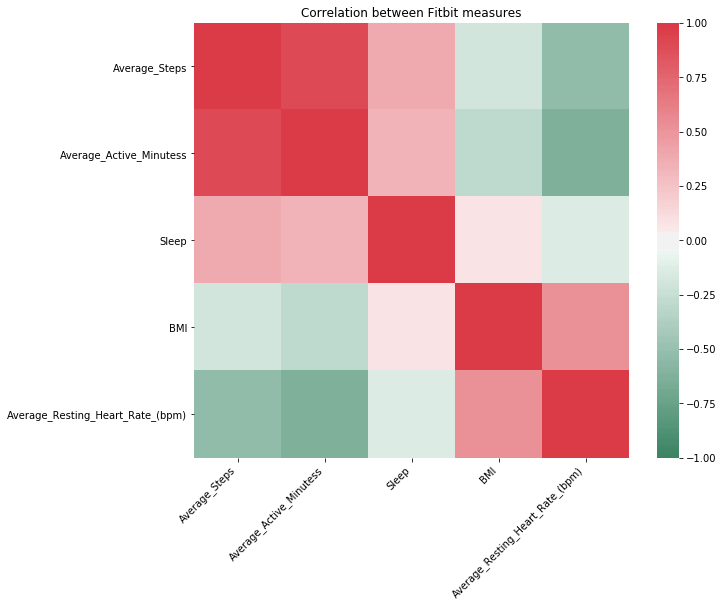

In [12]:
# Correlations and make a seaborn heatmap

data = df_fitbit

f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(150,10, n=200),
    square=True ) #annot=True, 
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

ax.set_title('Correlation between Fitbit measures');

Getting details of Correlation matrix

In [13]:
df_fitbit.corr()

,Average_Steps,Average_Active_Minutess,Sleep,BMI,Average_Resting_Heart_Rate_(bpm)
Average_Steps,1.000000,0.904618,0.389330,-0.196421,-0.533115
Average_Active_Minutess,0.904618,1.000000,0.330737,-0.290926,-0.625742
Sleep,0.389330,0.330737,1.000000,0.084246,-0.138352
BMI,-0.196421,-0.290926,0.084246,1.000000,0.518162
Average_Resting_Heart_Rate_(bpm),-0.533115,-0.625742,-0.138352,0.518162,1.000000


d)  Scatterplot of BMI and Average Active Minutes

Text(0.5, 1.0, 'BMI and Average Active Minutes')

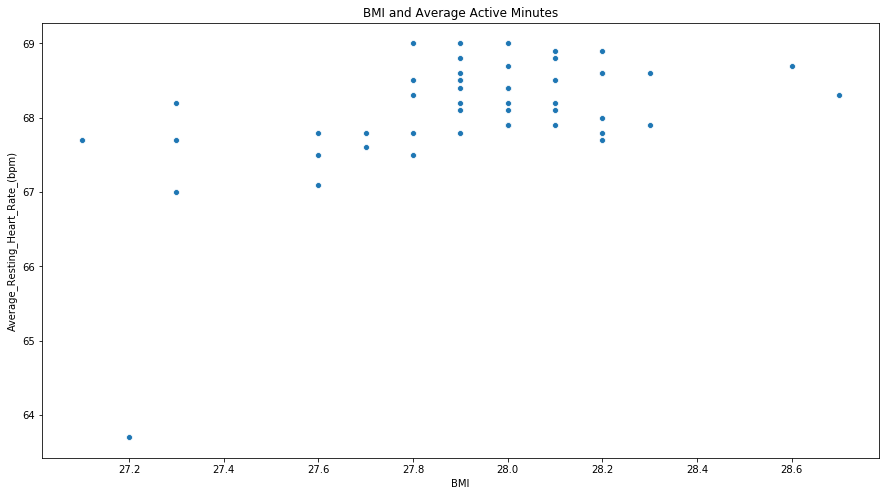

In [14]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot
ax = sns.scatterplot(x='BMI', y='Average_Resting_Heart_Rate_(bpm)', data=df_fitbit)

ax.set_title('BMI and Average Active Minutes')

e) Scatterplot of Sleep hours Vs. Average steps

Text(0.5, 1.0, 'Sleep hours and Average steps')

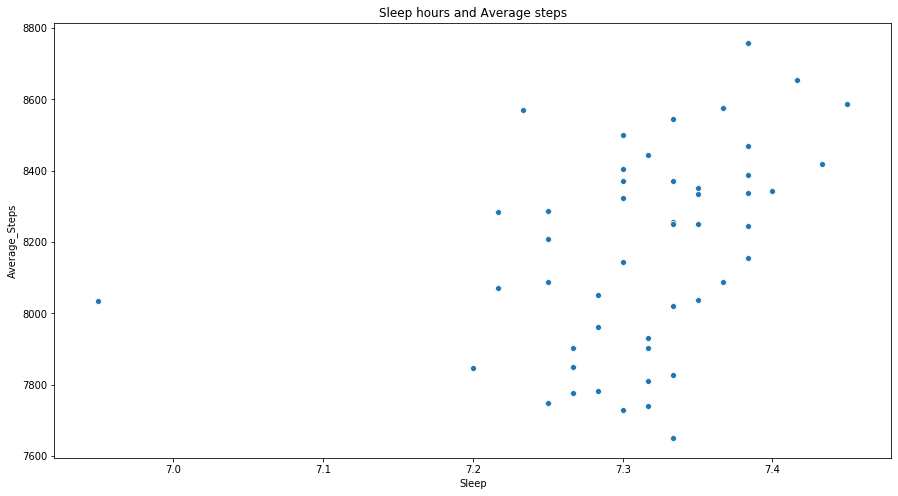

In [15]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot
ax = sns.scatterplot(x='Sleep', y='Average_Steps', data=df_fitbit)

ax.set_title('Sleep hours and Average steps')

f) Scatterplot of Sleep hours Vs Average_Resting_Heart_Rate

Text(0.5, 1.0, 'Sleep hours and Average Resting Heart Rate')

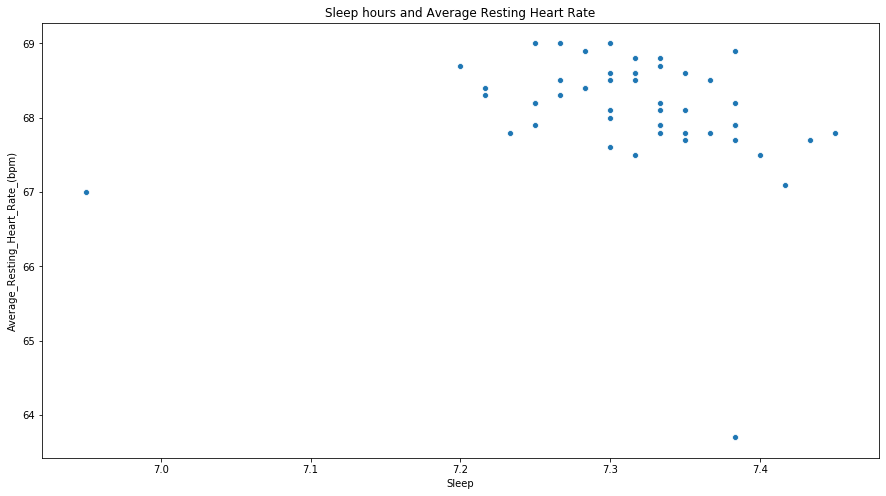

In [16]:
## figure size
plt.figure(figsize=(15,8))

# Simple scatterplot
ax = sns.scatterplot(x='Sleep', y='Average_Resting_Heart_Rate_(bpm)', data=df_fitbit)

ax.set_title('Sleep hours and Average Resting Heart Rate')

<h3>1.2 Data collection: Suicide deaths<h3/>

In [17]:
df_suicide=pd.read_excel("C:/Users/Franchi/Documents/DataWearabletechnologies/Suicide_Mortality_by_State2015-2016.xlsx")
df_suicide.head()

,YEAR,STATE,RATE,DEATHS
0,2016,AL,15.7,788
1,2016,AK,25.8,193
2,2016,AZ,17.7,1271
3,2016,AR,18.2,555
4,2016,CA,10.5,4294


<h3>2.2 Data Cleaning: Suicide deaths<h3/>

Removing RATE column

In [18]:
df_suicide=df_suicide.drop(['RATE'],axis=1)
df_suicide.head()

,YEAR,STATE,DEATHS
0,2016,AL,788
1,2016,AK,193
2,2016,AZ,1271
3,2016,AR,555
4,2016,CA,4294


<h3>3.2 Exploratory Data Analysis: Suicide deaths<h3/>

In [19]:
df_suicide.columns

Index(['YEAR', 'STATE', 'DEATHS'], dtype='object')

In [20]:
df_suicide.dtypes

YEAR       int64
STATE     object
DEATHS     int64
dtype: object

Getting only 2015

In [21]:
df_suicide_2015=df_suicide.loc[df_suicide['YEAR']==2015]
df_suicide_2015.head()

,YEAR,STATE,DEATHS
50,2015,AL,750
51,2015,AK,201
52,2015,AZ,1276
53,2015,AR,577
54,2015,CA,4167


Getting only 2016

In [22]:
df_suicide_2016=df_suicide[df_suicide.YEAR == 2016]
df_suicide_2016.head()

,YEAR,STATE,DEATHS
0,2016,AL,788
1,2016,AK,193
2,2016,AZ,1271
3,2016,AR,555
4,2016,CA,4294


Calculating the average of number of deaths between 2015 and 2016

In [23]:
#Grouping by state to obtaine the avergae of number of deaths
df_suicide20152016= df_suicide.groupby('STATE').mean().reset_index()
#Renaming new column
df_suicide20152016.rename(columns={"DEATHS": "Avg.num_of_Deaths"}, inplace=True)
df_suicide20152016.head()

,STATE,YEAR,Avg.num_of_Deaths
0,AK,2015.5,197.0
1,AL,2015.5,769.0
2,AR,2015.5,566.0
3,AZ,2015.5,1273.5
4,CA,2015.5,4230.5


In [24]:
df_suicide20152016.shape

(50, 3)

Concatenating the two main data sets: df_fitbit and df_suicide20152016

In [25]:
pd.concat([df_fitbit,df_suicide20152016])

,State,Average_Steps,Average_Active_Minutess,Sleep,BMI,Average_Resting_Heart_Rate_(bpm),STATE,YEAR,Avg.num_of_Deaths
1,Alabama,7740.0,25.0,7.316667,27.9,68.8,NaN,NaN,NaN
2,Alaska,8284.0,30.0,7.216667,28.7,68.3,NaN,NaN,NaN
3,Arizona,7902.0,27.0,7.266667,27.8,68.3,NaN,NaN,NaN
4,Arkansas,7650.0,24.0,7.333333,28.1,68.8,NaN,NaN,NaN
5,California,8209.0,28.0,7.250000,28.3,67.9,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
45,NaN,NaN,NaN,NaN,NaN,NaN,VT,2015.5,110.5
46,NaN,NaN,NaN,NaN,NaN,NaN,WA,2015.5,1139.0
47,NaN,NaN,NaN,NaN,NaN,NaN,WI,2015.5,871.5
48,NaN,NaN,NaN,NaN,NaN,NaN,WV,2015.5,351.0


The two dataframes do not fit, despite the states are the same. Because of, they are named in different ways: abbreviation vs. whole name. Thus, we'll add a column with the equivalent whole name into one of the dataframes, to make possible the match

In [26]:
#Adding the list of the whole name of all states
df_suicide20152016_name= df_suicide20152016.assign(State=['Alaska','Alabama', 'Arkansas','Arizona','California','Colorado', 'Connecticut','Delaware', 'Florida', 'Georgia','Hawaii','Iowa','Idaho','Illinois', 'Indiana', 'Kansas', 'Kentucky','Louisiana','Massachusetts','Maryland','Maine', 'Michigan','Minnesota', 'Missouri','Mississippi', 'Montana','North Carolina','North Dakota', 'Nebraska',  'New Hampshire','New Jersey', 'New Mexico','Nevada','New York','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Virginia','Vermont', 'Washington', 'Wisconsin','West Virginia','Wyoming'])
df_suicide20152016_name.head()

,STATE,YEAR,Avg.num_of_Deaths,State
0,AK,2015.5,197.0,Alaska
1,AL,2015.5,769.0,Alabama
2,AR,2015.5,566.0,Arkansas
3,AZ,2015.5,1273.5,Arizona
4,CA,2015.5,4230.5,California


In [27]:
frames= [df_fitbit,df_suicide20152016_name]

Now the two dataframes have the same pattern to name the states, it will match  

In [28]:
df_merge = pd.merge(df_fitbit,df_suicide20152016_name, left_on='State',right_on='State',how='outer',suffixes=('_left','_right'))
df_merge.head()

,State,Average_Steps,Average_Active_Minutess,Sleep,BMI,Average_Resting_Heart_Rate_(bpm),STATE,YEAR,Avg.num_of_Deaths
0,Alabama,7740,25,7.316667,27.9,68.8,AL,2015.5,769.0
1,Alaska,8284,30,7.216667,28.7,68.3,AK,2015.5,197.0
2,Arizona,7902,27,7.266667,27.8,68.3,AZ,2015.5,1273.5
3,Arkansas,7650,24,7.333333,28.1,68.8,AR,2015.5,566.0
4,California,8209,28,7.250000,28.3,67.9,CA,2015.5,4230.5


Dropping unwanted and extra columns

In [29]:
df_merge.drop(['STATE','YEAR'],axis=1, inplace=True)
df_merge.head()

,State,Average_Steps,Average_Active_Minutess,Sleep,BMI,Average_Resting_Heart_Rate_(bpm),Avg.num_of_Deaths
0,Alabama,7740,25,7.316667,27.9,68.8,769.0
1,Alaska,8284,30,7.216667,28.7,68.3,197.0
2,Arizona,7902,27,7.266667,27.8,68.3,1273.5
3,Arkansas,7650,24,7.333333,28.1,68.8,566.0
4,California,8209,28,7.250000,28.3,67.9,4230.5


Verifying there are 50th states

In [30]:
df_merge.shape

(50, 7)

<h3>4.2 Examine: Suicide deaths<h3/>

a) Correlation matrix between Fitbit measures and number of deaths by Suicide

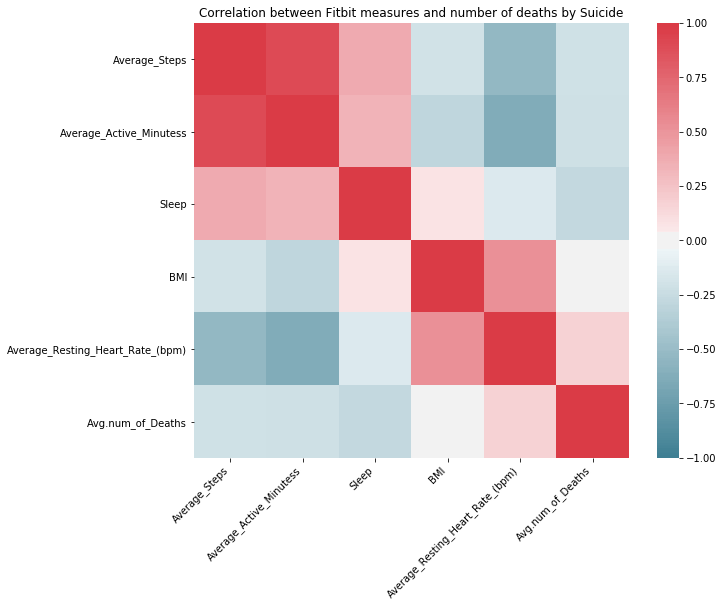

In [31]:
# Correlations and make a seaborn heatmap

data = df_merge

f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220,10, n=200),
    square=True 
)#,annot=True
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

ax.set_title('Correlation between Fitbit measures and number of deaths by Suicide');

Getting details of Correlation matrix

In [32]:
df_merge.corr()

,Average_Steps,Average_Active_Minutess,Sleep,BMI,Average_Resting_Heart_Rate_(bpm),Avg.num_of_Deaths
Average_Steps,1.000000,0.904618,0.389330,-0.196421,-0.533115,-0.209293
Average_Active_Minutess,0.904618,1.000000,0.330737,-0.290926,-0.625742,-0.212894
Sleep,0.389330,0.330737,1.000000,0.084246,-0.138352,-0.266286
BMI,-0.196421,-0.290926,0.084246,1.000000,0.518162,0.025233
Average_Resting_Heart_Rate_(bpm),-0.533115,-0.625742,-0.138352,0.518162,1.000000,0.173608
Avg.num_of_Deaths,-0.209293,-0.212894,-0.266286,0.025233,0.173608,1.000000


b) Scatterplot of Avg.num of deaths by Suicide and Average Resting Heart Rate

Text(0.5, 1.0, 'Avg.num of deaths by Suicide and Average Resting Heart Rate')

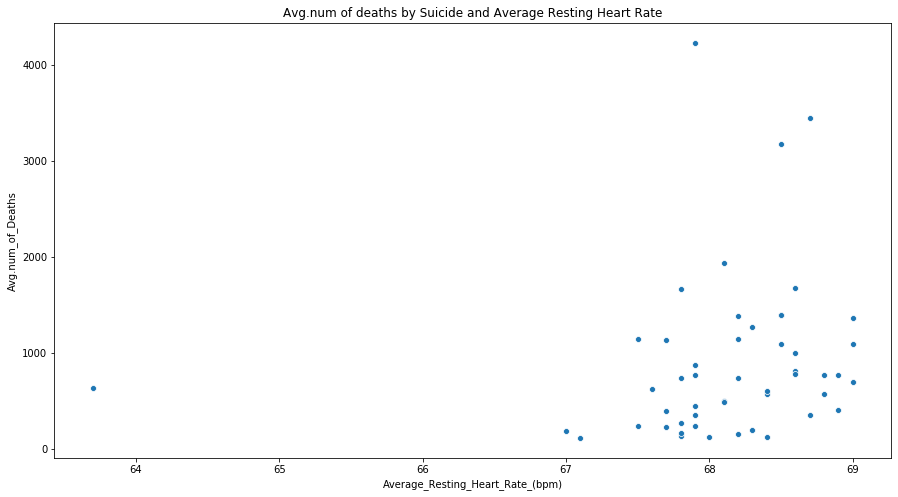

In [33]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot
ax = sns.scatterplot(y='Avg.num_of_Deaths', x='Average_Resting_Heart_Rate_(bpm)', data=df_merge)

ax.set_title('Avg.num of deaths by Suicide and Average Resting Heart Rate')

c) Bar graph of Number of deaths by suicide from 2015 to 2016

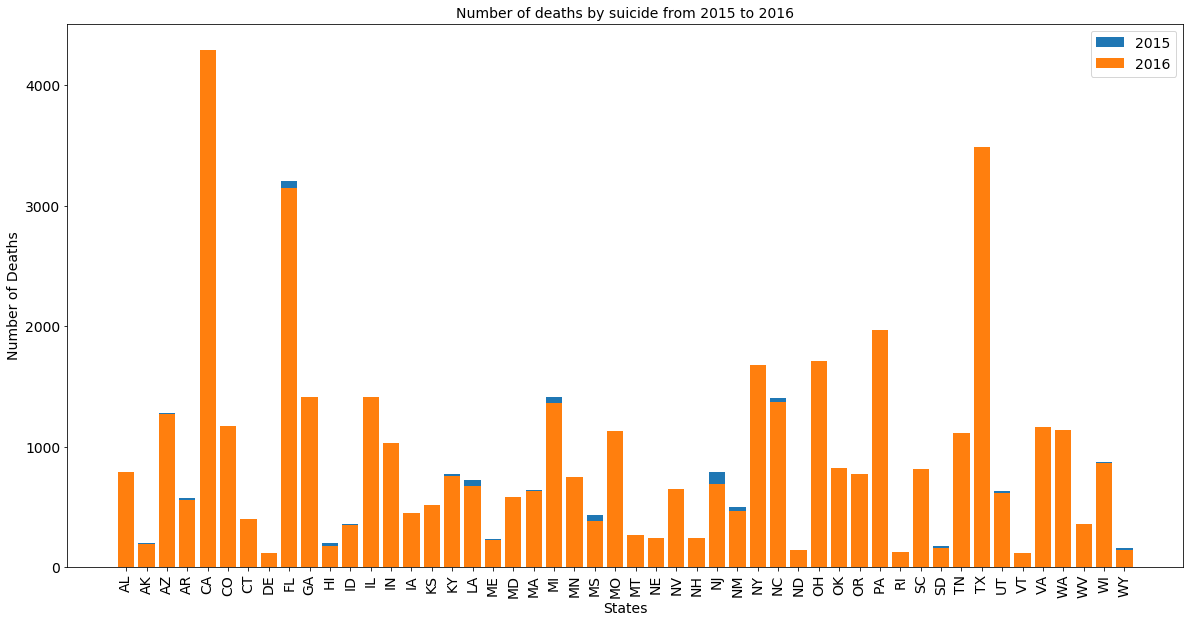

In [34]:
plt.figure(figsize=(20,10)) 
plt.bar(df_suicide_2015.STATE, df_suicide_2015.DEATHS)
plt.bar(df_suicide_2016.STATE, df_suicide_2016.DEATHS)


plt.legend(['2015','2016'], fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.title('Number of deaths by suicide from 2015 to 2016', fontsize=14)
plt.ylabel('Number of Deaths', fontsize=14)
plt.xlabel('States', fontsize=14)

plt.show()

d) Map - Average Suicide deaths in the U.S from 2015 to 2016

In [35]:
us_geo_ = r'us-states.json' # geojson file

# create a plain us map
us_map_ = folium.Map(location=[48, -102], zoom_start=3.2, tiles='Mapbox Bright')

In [36]:
# generate choropleth map using the avg steps of each U.S states from 2015 to 2016
us_map_.choropleth(
    geo_data=us_geo_,
    data=df_merge,
    columns=['State','Avg.num_of_Deaths'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Suicide deaths in the U.S from 2015 to 2016'
)

# display map
us_map_

C:\Users\Franchi\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## IV. Discussion

<p>A.-The Fitbit measures correlation<p/>

**Strong relationships:**
*  Average steps and active minutes 

**Moderate relationships:**
* BMI and Average resting heart rate 
* Average steps and sleep hours 
* Average active minutes and sleep hours 

According to general medical advice, regular physical exercise improves health, especially to increase sleep quality, to reduce weight, to build muscle mass, and to exercise the heart muscle since most of the relationships presented above are self – explanatory and predictable to happen.

<p>B.-The Suicide Deaths and measures Fitbit correlation<p/>

**Weak relationships:**
* Average of deaths by Suicide and Resting heart rate 

<p>This correlation includes the Fitbit features already analyzed, plus the Average of deaths by Suicide. This last feature – Deaths by Suicide do not show a strong association with the rest of Fitbit features.
Although it is valid the correlation between the Average of deaths by Suicide and the Average resting heart rate; This correlation is aligned with the American Heart Association’s statement about the emotions affect heart rate. ‘If you’re stressed, anxious or “extraordinarily happy or sad” your feelings can raise your pulse.’</p>
<p>The scatterplot of Avg.num of deaths by Suicide and Average Resting Heart Rate shows a general pattern; when the pulse (avg. resting heart rate) goes up, the number of deaths increases, and vice versa.</p>
<p>But this tendency is not clear on the above two maps: Average Suicide deaths in the U.S from 2015 to 2016, and, Average_Resting_Heart_Rate in the U.S from 2015 to 2016. For instance, in California, the avg. Resting heart rate is not too elevated, but the number of suicides is the highest in the U.S. Contrary, Massachusetts’ avg. Resting heart rate is the lowest in the U.S., and it has a small number of suicides.</p>

## V. Conclusion

<p>Preliminarily, this correlation can be a relevant indicator to prevent Suicide. However, we should research more about it to assume a conclusion. <p/>

## VI. Limitations

<p>The data produced by wearable technologies is exceptionally sensible and personal, and it is rarely delivered to public access; thus, it is restricted. However, there are non-official studies that collected information from volunteers. But, at this point in our investigation, we focused on data classified by states, which was posted by Fitbit. <p/>